In [ ]:
import numpy as np

In [ ]:
!pip install fuzzy-extractor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Data**

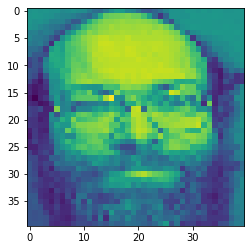

In [ ]:
import numpy as np
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
DATADIR = '/content/drive/MyDrive/Face_biometrics/ORLdataset'
personimages = []
for fol in os.listdir(DATADIR):
  path = os.path.join(DATADIR,fol)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    new_array = cv2.resize(img_array,(40,40))
    new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
    personimages.append(new_array)
    plt.imshow(new_array)
  break

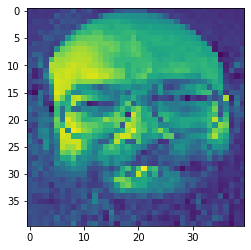

In [ ]:
plt.imshow(personimages[7])

#**Checking Size**

In [ ]:
import sys
print("Size of list1: " + str(sys.getsizeof(personimages[7])) + "bytes")

Size of list1: 1720bytes


#**Flatten Array**

In [ ]:
new_array.flatten().shape

(1600,)

In [ ]:
personimages[0].shape,personimages[1].shape

((40, 40), (40, 40))

In [ ]:
image_string = ','.join(f"{e:03}" for e in personimages[0].flatten())
len(image_string)

6399

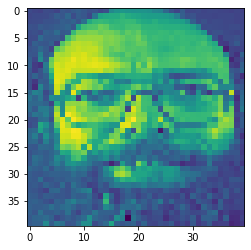

In [ ]:
def string_to_img(image_string):
  flattened_array = image_string.split(",")
  flattened_array = np.array([ int(x) for x in flattened_array ])
  flattened_array = flattened_array.reshape(40,40)
  return flattened_array

plt.imshow(string_to_img(image_string))

#**Implementation of Fuzzy-extractor and Testing**

In [ ]:
from fuzzy_extractor import FuzzyExtractor
extractor = FuzzyExtractor(6399, 8)
key,helper = extractor.generate(image_string)

In [ ]:
key

b'{\x85\x99\xf2\x88\xca\xf0P\xe2Z\xa6\xff\x8cs\x99\xf1.\x8fV}\xefY\xee(h\xf7\xbe\xd0K\xed\xadCT\xb5\x1aDaY\xcb\x13\xd9\'\x82\xd0\xa8s\xb3<Z\x86=~\xc9T\x07\xcaP\x03\x9aa\xf6\x8c\xbb\x0ej\xf8 \x86\x08\xc4\xde\xcb-9\x94\nT\x02\xcf\x18R\xb9\x0c\x8f\x9fz\xab\xec&\xd9\x93\xaa\x80\x0eI\xeb\x18!\xff\x001\xbc\xcf\x81\\\x80\x0f?\xd9K\xe3\xe3\xe4e\x8c*\x90\x85\xe1j\xa9\x86\x83\xe1\xda\xac\xbc\xd7 \xf1\x83\xc2\xce[\xf8\x87\xa9\xff\x82\x0f#\xf8\xa0\xe8\xcbcL\xd5\x82\xd5=[\xd6\xe4\xb2\x02x\xb0\xedz\xb1%q=\xc0K\n\xca\xbe\xb1\xa3\x8f@\x7frD\xb5]j\xa8\x91\xa1e\xfe\xae\xfb;o\xc8\xfe\x1dL\xdevl.\x1b\xafN\xff/\xb7\xd2;\x00\x9a#9\xe8_+l?j\xda?n\xbe\xab+,b&\x85\xde\xe3\xa25\xf4&\xf2%W7\x81o;\x8ej\xe44\x19\xdfa\xa8\xc5`\x87M`\xbeb\xb8\xf8\xed\xd4\\\x03\xfe\xe9\xc03\x06:\x94\rl\xe4C\xf3q\x84\xc0\xcf9\xff??\xabt\'\xf6\x9d\x92\x9cX\x16\xce\xca;\x98R\x14\xc5]\x83\xcah1$\xb5\xc4\xa2\xb7y\xd6\x9dXY\xe9\xc6\x9c\xc2\xef\xe9\xceuv\xed\x82\xc0Vc\xd7=\xfd\x81\x80F]C\x04\x1e\x03\\\xc0\xf4\xe76v\x8ed\x00\xd9\x1d\xbf\xa1>

In [ ]:
helper[0].shape,helper[1].shape,helper[2].shape

((32689, 6401), (32689, 6399), (32689, 16))

In [ ]:
len(key)

6399

In [ ]:
image_string = ','.join(f"{e:03}" for e in personimages[1].flatten())
len(image_string)

6399

In [ ]:
r_key = extractor.reproduce(image_string, helper)

In [ ]:
len(r_key)

6399

In [ ]:
r_key

b'\xe1\x1a<\x8f>\x12\x15\x86-\xb3\x94=\x8d\xa0\x7f;'

In [ ]:
key==r_key

False